In [6]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [8]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [10]:
list_of_tickers = ["SPY", "AGG"]

end_date = datetime.now()
start_date = end_date + timedelta(-365)

df = get_historical_data(list_of_tickers, start_date, end_date, output_format='pandas')
df.head()

SPY                                        AGG                  \
              open    high     low   close     volume    open    high     low   
date                                                                            
2019-01-28  263.39  263.83  261.79  263.76   85613655  106.62  106.75  106.58   
2019-01-29  263.92  264.55  262.48  263.41   66136334  106.73  106.93  106.69   
2019-01-30  265.10  268.52  264.25  267.58   92473671  106.79  107.15  106.79   
2019-01-31  267.51  270.47  267.27  269.93  104012073  107.30  107.53  107.29   
2019-02-01  270.15  271.20  269.18  270.06   85782524  107.09  107.15  106.88   

                              
             close    volume  
date                          
2019-01-28  106.62   7365747  
2019-01-29  106.90   6158607  
2019-01-30  107.14   6350434  
2019-01-31  107.46  14766451  
2019-02-01  106.97   7227896

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [224]:
df.to_pickle('portfolio_df.pickle')

In [241]:
df = pd.read_pickle('portfolio_df.pickle')

In [290]:
# Calculate the daily roi for the stocks

df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
daily_returns = df.pct_change().dropna()
daily_returns.rename(columns={'close': 'Daily ROI'}, inplace=True)
daily_returns.head()

,SPY,AGG
,Daily ROI,Daily ROI
date,,
2019-01-29,-0.001327,0.002626
2019-01-30,0.015831,0.002245
2019-01-31,0.008782,0.002987
2019-02-01,0.000482,-0.004560
2019-02-04,0.007035,-0.000841


In [243]:
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
avg_daily_return_agg = daily_returns.mean()['AGG']['close']

In [244]:
# Calculate volatility

daily_returns_std_spy = daily_returns.std()['SPY']['close']
daily_returns_std_agg = daily_returns.std()['AGG']['close']
daily_returns_std_total = (daily_returns_std_spy * weights[0]) + (daily_returns_std_agg * weights[1])
daily_returns_std_total

0.005273288240536968

In [245]:
# Save the last day's closing price

spy_last_price = df['SPY']['close'][-1]
agg_last_price = df['AGG']['close'][-1]

In [246]:
weights = [0.6, 0.4]

In [247]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [299]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    
    simulated_spy = [spy_last_price]
    simulated_agg = [agg_last_price]
    
    for i in range(number_records):
        
        simulated_spy_price = simulated_spy[-1] *\
        (1 + np.random.normal(avg_daily_return_spy, daily_returns_std_spy))
        
        simulated_agg_price = simulated_agg[-1] *\
        (1 + np.random.normal(avg_daily_return_agg, daily_returns_std_agg))
        
        simulated_spy.append(simulated_spy_price)
        simulated_agg.append(simulated_agg_price)
        
    monte_carlo["SPY prices"] = pd.Series(simulated_spy)
    monte_carlo["AGG prices"] = pd.Series(simulated_agg)
    
    simulated_daily_returns = monte_carlo.pct_change()
    
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[f"Simulation {x+1}"] = (1 + portfolio_daily_returns.fillna(0)).cumprod()
    
portfolio_cumulative_returns.head()
    

,0,1,2,3,4,5,6,7,8,9,...,Simulation 491,Simulation 492,Simulation 493,Simulation 494,Simulation 495,Simulation 496,Simulation 497,Simulation 498,Simulation 499,Simulation 500
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007030,0.995253,0.998583,1.006130,1.007998,1.000087,0.999471,1.000954,1.002905,0.998300,...,1.001830,1.000914,0.996505,0.993562,0.997357,0.994259,0.995280,1.000959,1.000233,0.998947
2,1.006149,0.996965,0.998466,1.005566,1.008365,1.010418,0.999247,0.995821,1.004658,0.994433,...,0.998289,1.009101,1.005004,0.994005,1.004804,0.993422,0.996148,0.998624,1.000421,0.998869
3,1.001160,1.000113,1.001115,1.002030,1.001479,1.007491,1.003185,0.990060,1.005408,0.993348,...,0.997672,1.001791,1.001425,0.994338,1.007224,0.997253,0.997937,0.993449,0.998488,0.998986
4,1.000834,1.005278,0.998331,1.001445,1.003153,1.005099,1.017432,0.994732,1.007942,0.993723,...,0.998237,0.998993,0.998528,1.001761,1.005894,0.999878,1.004249,0.992309,0.996959,0.999528


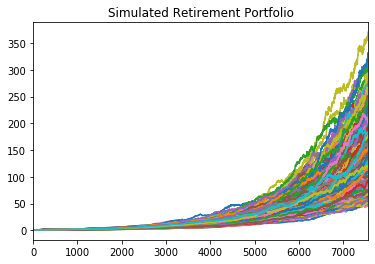

In [249]:
# Visualize the Simulation

portfolio_cumulative_returns.plot(legend=None, title="Simulated Retirement Portfolio")

In [295]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)

last_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
last_cumulative_returns.head()

0    168.218290
1    134.478431
2    141.971354
3    139.516961
4     86.412894
Name: 7560, dtype: float64

In [296]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)

cumulative_returns_20 = portfolio_cumulative_returns.iloc[-2520, :]
cumulative_returns_20.head()

0    22.882055
1    32.760865
2    34.584203
3    23.949777
4    20.932368
Name: 5041, dtype: float64

In [252]:
# Display the 90% confidence interval for the ending returns

confidence_interval = last_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05     65.756661
0.95    249.071049
Name: 7560, dtype: float64

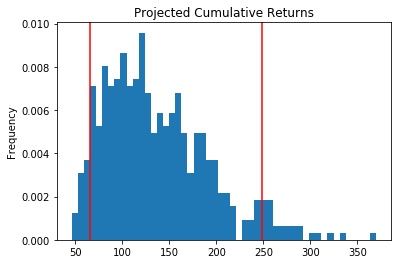

In [253]:
# Visualize the distribution of the ending returns

plt.figure();
last_cumulative_returns.plot(kind='hist', title='Projected Cumulative Returns', density=True, bins=50)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [254]:
return_10_perc = last_cumulative_returns.quantile(0.1)
return_50_perc = last_cumulative_returns.quantile(0.5)
return_90_perc = last_cumulative_returns.quantile(0.9)

print(f"10th Percentile: {round(return_10_perc * 100,2)}%")
print(f"50th Percentile: {round(return_50_perc * 100,2)}%")
print(f"90th Percentile: {round(return_90_perc * 100,2)}%")

10th Percentile: 7295.51%
50th Percentile: 12608.22%
90th Percentile: 20830.95%


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [255]:
initial_investment = 20000

return_10_perc_amount = last_cumulative_returns.quantile(0.1) * initial_investment
return_50_perc_amount = last_cumulative_returns.quantile(0.5) * initial_investment
return_90_perc_amount = last_cumulative_returns.quantile(0.9) * initial_investment

print(f"10th Percentile: ${round(return_10_perc_amount,2)}")
print(f"50th Percentile: ${round(return_50_perc_amount,2)}")
print(f"90th Percentile: ${round(return_90_perc_amount,2)}")

10th Percentile: $1459102.0
50th Percentile: $2521644.98
90th Percentile: $4166190.19


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [256]:
# YOUR CODE HERE
withdrawal_rate = 0.04
future_annual_withdrawal = return_10_perc_amount * withdrawal_rate

print(f"Future 4% withdrawal: ${round(future_annual_withdrawal,2)}")
print()
print(f"Given the current projected income for 2020 of $7389, the future annual \
withdrawal of ${round(future_annual_withdrawal,2)} is more than sufficient to maintain \
the investor's income requirements.")

Future 4% withdrawal: $58364.08

Given the current projected income for 2020 of $7389, the future annual withdrawal of $58364.08 is more than sufficient to maintain the investor's income requirements.


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [257]:
# YOUR CODE HERE
initial_investment_50per = initial_investment * 1.5
higher_return_10_perc_amount = last_cumulative_returns.quantile(0.1) * initial_investment_50per
higher_future_annual_withdrawal = higher_return_10_perc_amount * withdrawal_rate

print(f"Future 4% withdrawal with initial investment of \
${int(initial_investment_50per):,d}: ${round(higher_future_annual_withdrawal,2)}")
print()
print(f"Given the current projected income for 2020 of $7389, the future annual \
withdrawal of ${round(higher_future_annual_withdrawal,2)} would far exceed \
the investor's income requirements.")

Future 4% withdrawal with initial investment of $30,000: $87546.12

Given the current projected income for 2020 of $7389, the future annual withdrawal of $87546.12 would far exceed the investor's income requirements.


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [284]:
quantiles = pd.DataFrame()
quantiles['0.05'] = portfolio_cumulative_returns.quantile(q=0.05, axis=1)
quantiles['0.5'] = portfolio_cumulative_returns.quantile(q=0.5, axis=1)
quantiles['0.95'] = portfolio_cumulative_returns.quantile(q=0.95, axis=1)

quantiles.tail()

,0.05,0.5,0.95
7556,65.599838,125.758867,248.088056
7557,65.802182,125.703069,248.873072
7558,65.602444,125.771267,248.898968
7559,65.587571,126.094867,248.046530
7560,65.756661,126.082249,249.071049


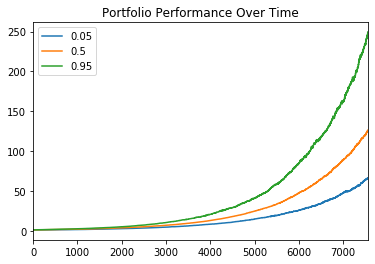

In [287]:
quantiles.plot(title='Portfolio Performance Over Time')

## Early Retirement

In [301]:
number_simulations = 500
number_records_5yr = 252 * 5
monte_carlo_5yr = pd.DataFrame()
portfolio_cumulative_returns_5yr = pd.DataFrame()
weights_5yr = [0.8, 0.2]

for x in range(number_simulations):
    
    simulated_spy_5yr = [spy_last_price]
    simulated_agg_5yr = [agg_last_price]
    
    for i in range(number_records_5yr):
        
        simulated_spy_price_5yr = simulated_spy_5yr[-1] *\
        (1 + np.random.normal(avg_daily_return_spy, daily_returns_std_spy))
        
        simulated_agg_price_5yr = simulated_agg_5yr[-1] *\
        (1 + np.random.normal(avg_daily_return_agg, daily_returns_std_agg))
        
        simulated_spy_5yr.append(simulated_spy_price_5yr)
        simulated_agg_5yr.append(simulated_agg_price_5yr)
        
    monte_carlo_5yr["SPY prices"] = pd.Series(simulated_spy_5yr)
    monte_carlo_5yr["AGG prices"] = pd.Series(simulated_agg_5yr)
    
    simulated_daily_returns_5yr = monte_carlo_5yr.pct_change()
    
    portfolio_daily_returns_5yr = simulated_daily_returns_5yr.dot(weights_5yr)
    
    portfolio_cumulative_returns_5yr[x] = (1 + portfolio_daily_returns_5yr.fillna(0)).cumprod()
    
portfolio_cumulative_returns_5yr.head()
    

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005092,0.985907,1.004838,1.000434,1.007449,0.995856,0.993545,1.002413,1.012800,0.997469,...,0.993481,1.002702,1.014796,1.002939,0.985914,1.006323,1.006545,1.018130,0.989644,1.016762
2,0.998460,0.989450,1.008643,1.010653,1.011869,0.997851,0.987765,1.002343,1.012584,1.000556,...,0.985960,1.008809,1.011712,1.005742,0.989651,1.006181,1.006679,1.014181,0.993886,1.017488
3,1.012971,0.988348,1.008028,1.003291,1.004498,1.009441,1.000312,1.006505,1.013577,0.992182,...,0.980081,1.011630,1.025550,1.005554,0.983814,1.012618,1.018882,1.013455,1.001000,1.022459
4,1.019689,0.989645,1.005700,1.001308,1.015147,1.006452,0.996251,1.007958,1.012638,0.990143,...,0.985575,1.011787,1.029648,1.002362,0.981147,1.010436,1.019113,1.004614,1.010154,1.027336


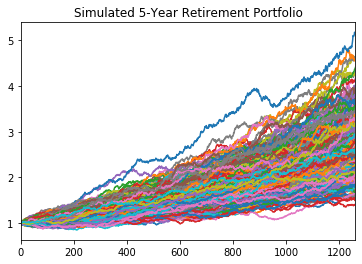

In [302]:
portfolio_cumulative_returns_5yr.plot(legend=None, title="Simulated 5-Year Retirement Portfolio")


In [303]:
last_cumulative_returns_5yr = portfolio_cumulative_returns_5yr.iloc[-1, :]
last_cumulative_returns_5yr.head()

0    2.647429
1    3.059788
2    3.596816
3    3.396580
4    4.012514
Name: 1260, dtype: float64

In [304]:
confidence_interval_5yr = last_cumulative_returns_5yr.quantile(q=[0.05, 0.95])
confidence_interval_5yr

0.05    1.834194
0.95    3.673516
Name: 1260, dtype: float64

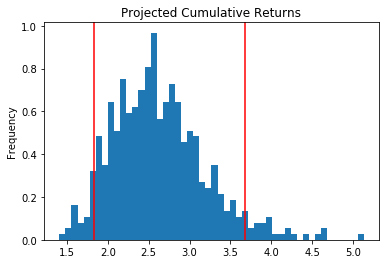

In [305]:
plt.figure();
last_cumulative_returns_5yr.plot(kind='hist', title='Projected Cumulative Returns', density=True, bins=50)
plt.axvline(confidence_interval_5yr.iloc[0], color='r')
plt.axvline(confidence_interval_5yr.iloc[1], color='r')

In [306]:
return_10_perc_5yr = last_cumulative_returns_5yr.quantile(0.1)
return_50_perc_5yr = last_cumulative_returns_5yr.quantile(0.5)
return_90_perc_5yr = last_cumulative_returns_5yr.quantile(0.9)

print(f"10th Percentile: {round(return_10_perc_5yr * 100,2)}%")
print(f"50th Percentile: {round(return_50_perc_5yr * 100,2)}%")
print(f"90th Percentile: {round(return_90_perc_5yr * 100,2)}%")

10th Percentile: 194.82%
50th Percentile: 256.55%
90th Percentile: 334.47%


In [307]:
initial_investment_5yr = 100000

return_10_perc_amount_5yr = last_cumulative_returns_5yr.quantile(0.1) * initial_investment_5yr
return_50_perc_amount_5yr = last_cumulative_returns_5yr.quantile(0.5) * initial_investment_5yr
return_90_perc_amount_5yr = last_cumulative_returns_5yr.quantile(0.9) * initial_investment_5yr

print(f"10th Percentile: ${round(return_10_perc_amount_5yr,2)}")
print(f"50th Percentile: ${round(return_50_perc_amount_5yr,2)}")
print(f"90th Percentile: ${round(return_90_perc_amount_5yr,2)}")

10th Percentile: $194820.42
50th Percentile: $256546.84
90th Percentile: $334473.89


In [308]:
withdrawal_rate_5yr = 0.04
future_annual_withdrawal_5yr = return_10_perc_amount_5yr * withdrawal_rate_5yr

print(f"Future 4% withdrawal: ${round(future_annual_withdrawal_5yr,2)}")

Future 4% withdrawal: $7792.82


In [309]:
current_income = 7389

cum_ret = current_income / withdrawal_rate_5yr
init_invest = cum_ret / last_cumulative_returns_5yr.quantile(0.1)

print(f"Given the {int(weights_5yr[0]*100)}%/{int(weights_5yr[1]*100)}% stock/bond \
allocation of the portfolio, the cumulative 5-year return would need to be \
${round(init_invest,2)} in order to produce a 4% annual withdrawal to match the \
current income of ${int(current_income):,d}.")


Given the 80%/20% stock/bond allocation of the portfolio, the cumulative 5-year return would need to be $94818.09 in order to produce a 4% annual withdrawal to match the current income of $7,389.
